# Chest X-ray Image Prediction using Deep Learning

### Predicting whether a person has Pneumonia disease or not

In [1]:
import json

In [2]:
filepath = r"C:\Users\K Sharanya\Desktop\Projects\Chest X-Ray prediction using Deep Learning\chest-xray-pneumonia-metadata.json"
with open(filepath,'r') as f:
    data = json.load(f)
    print(type(data))
    print(data)

<class 'dict'>
{'@context': {'@language': 'en', '@vocab': 'https://schema.org/', 'citeAs': 'cr:citeAs', 'column': 'cr:column', 'conformsTo': 'dct:conformsTo', 'cr': 'http://mlcommons.org/croissant/', 'data': {'@id': 'cr:data', '@type': '@json'}, 'dataBiases': 'cr:dataBiases', 'dataCollection': 'cr:dataCollection', 'dataType': {'@id': 'cr:dataType', '@type': '@vocab'}, 'dct': 'http://purl.org/dc/terms/', 'extract': 'cr:extract', 'field': 'cr:field', 'fileProperty': 'cr:fileProperty', 'fileObject': 'cr:fileObject', 'fileSet': 'cr:fileSet', 'format': 'cr:format', 'includes': 'cr:includes', 'isEnumeration': 'cr:isEnumeration', 'jsonPath': 'cr:jsonPath', 'key': 'cr:key', 'md5': 'cr:md5', 'parentField': 'cr:parentField', 'path': 'cr:path', 'personalSensitiveInformation': 'cr:personalSensitiveInformation', 'recordSet': 'cr:recordSet', 'references': 'cr:references', 'regex': 'cr:regex', 'repeated': 'cr:repeated', 'replace': 'cr:replace', 'sc': 'https://schema.org/', 'separator': 'cr:separator'

In [3]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
# resizing images to square matrix
image_size = [224, 224]

In [5]:
train_path = r"C:\Users\K Sharanya\Desktop\Projects\Chest X-Ray prediction using Deep Learning\rscbjbr9sj-2\chest_xray\train"
test_path = r"C:\Users\K Sharanya\Desktop\Projects\Chest X-Ray prediction using Deep Learning\rscbjbr9sj-2\chest_xray\train"

In [6]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

In [7]:
# not training existing weights
for layer in vgg.layers:
    layer.trainable = False

In [8]:
# using 'glob' function to check how many number of classes are there
folders = glob(f'{train_path}/*')

In [9]:
x = Flatten()(vgg.output)    #layers

In [10]:
# applying activation function to 'x' layers
prediction = Dense(len(folders), activation='softmax')(x)

Wrapping this inside a model wherein input is vgg input and output is the prediction layer:

In [11]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [12]:
model.summary()      # view model structure

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │          50,178 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
# tell the model what cost and optimization method to use
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path, target_size = (224, 224), batch_size = 32, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path, target_size = (224, 224), batch_size = 32, class_mode = 'categorical')

Found 5232 images belonging to 2 classes.
Found 5232 images belonging to 2 classes.


In [15]:
model.evaluate(test_set)

C:\DS_Apps\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 1384s 8s/step - accuracy: 0.2508 - loss: 0.9609


[0.9629290103912354, 0.24617737531661987]

Fit the model:

In [16]:
r = []
for epoch in range(5):
    model.fit(
        training_set,
        validation_data=test_set,
        epochs=1,  # Run one epoch at a time
        steps_per_epoch=len(training_set),
        validation_steps=len(test_set)
    )
    training_set.reset()  # Reset the iterator for the next epoch
    test_set.reset()
    r.append(epoch)

C:\DS_Apps\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 2988s 18s/step - accuracy: 0.8320 - loss: 0.4067 - val_accuracy: 0.9652 - val_loss: 0.0970
164/164 ━━━━━━━━━━━━━━━━━━━━ 3111s 19s/step - accuracy: 0.9536 - loss: 0.1159 - val_accuracy: 0.9520 - val_loss: 0.1264
164/164 ━━━━━━━━━━━━━━━━━━━━ 3314s 20s/step - accuracy: 0.9619 - loss: 0.0914 - val_accuracy: 0.9618 - val_loss: 0.1025
164/164 ━━━━━━━━━━━━━━━━━━━━ 6227s 38s/step - accuracy: 0.9651 - loss: 0.1010 - val_accuracy: 0.9211 - val_loss: 0.2474
164/164 ━━━━━━━━━━━━━━━━━━━━ 3925s 24s/step - accuracy: 0.9703 - loss: 0.0815 - val_accuracy: 0.9178 - val_loss: 0.2425


In [16]:
r = []
for epoch in range(5):
    history = model.fit(
        training_set,
        validation_data=test_set,
        epochs=1,  # Run one epoch at a time
        steps_per_epoch=len(training_set),
        validation_steps=len(test_set)
    )
    training_set.reset()  # Reset the iterator for the next epoch
    test_set.reset()
    r.append(history)

C:\DS_Apps\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 2861s 17s/step - accuracy: 0.8668 - loss: 0.3490 - val_accuracy: 0.9685 - val_loss: 0.0861
164/164 ━━━━━━━━━━━━━━━━━━━━ 2776s 17s/step - accuracy: 0.9522 - loss: 0.1205 - val_accuracy: 0.9318 - val_loss: 0.1846
164/164 ━━━━━━━━━━━━━━━━━━━━ 2792s 17s/step - accuracy: 0.9654 - loss: 0.0957 - val_accuracy: 0.9446 - val_loss: 0.1482
164/164 ━━━━━━━━━━━━━━━━━━━━ 3284s 20s/step - accuracy: 0.9687 - loss: 0.0819 - val_accuracy: 0.9734 - val_loss: 0.0659
164/164 ━━━━━━━━━━━━━━━━━━━━ 7082s 43s/step - accuracy: 0.9656 - loss: 0.1037 - val_accuracy: 0.9602 - val_loss: 0.1117


In [18]:
# Extracting the accuracies
train_acc = [x.history['accuracy'][0] for x in r]  
val_acc = [x.history['val_accuracy'][0] for x in r]  

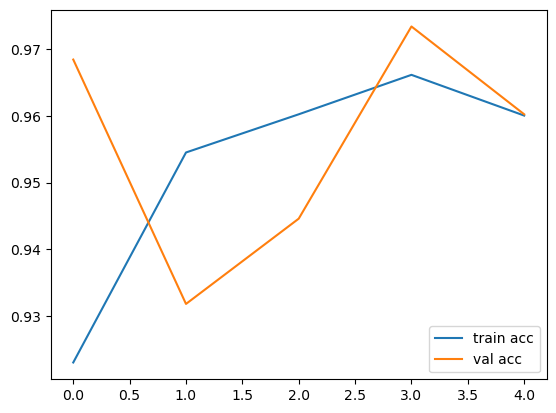

<Figure size 640x480 with 0 Axes>

In [19]:
# Plotting the accuracies
plt.plot(train_acc, label='train acc')
plt.plot(val_acc, label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
# extracting the losses
train_loss = [x.history['loss'][0] for x in r]  
val_loss = [x.history['val_loss'][0] for x in r]  

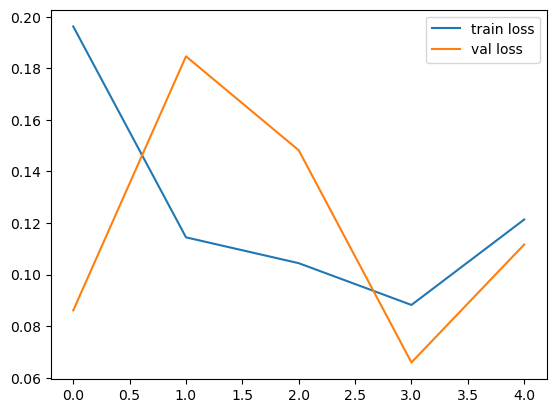

<Figure size 640x480 with 0 Axes>

In [21]:
# plotting the losses
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [22]:
import tensorflow as tf
from tensorflow.keras.models import load_model
model.save('model_vgg19.keras')

In [23]:
# Predicitng Models

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
model = load_model('model_vgg19.keras')
pneu_val_loc = r"C:\Users\K Sharanya\Downloads\rscbjbr9sj-2\chest_xray\val\PNEUMONIA"
img_path = f"{pneu_val_loc}\\person1951_bacteria_4882.jpeg"
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step


In [24]:
classes

array([[0., 1.]], dtype=float32)

This indicates that the person in image person1951_bacteria_4882.jpeg has pneumonia.

In [25]:
normal_val_loc = r"C:\Users\K Sharanya\Desktop\Projects\Chest X-Ray prediction using Deep Learning\rscbjbr9sj-2\chest_xray\val\NORMAL"
img_path2 = f"{normal_val_loc}\\NORMAL2-IM-1437-0001.jpeg"
img2 = image.load_img(img_path2, target_size=(224, 224))
x2 = image.img_to_array(img2)
x2 = np.expand_dims(x2, axis=0)
img_data2 = preprocess_input(x2)
class2 = model.predict(img_data2)
print(class2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
[[1. 0.]]


In [26]:
class2

array([[1., 0.]], dtype=float32)

The above output indicates that the person in image NORMAL2-IM-1437-0001.jpeg has is not affected.